#### Description of dataset 

In this project I will be analyzing data associated with patients and their hospital appointments.I will be interested in finding trends betweeen patients who show up for their appointments and patients who do not.The No-show appointments database  contains information collected from over 100 thousand medical appointments in Brazil and its main focus is to show whther or not patients showed up for their appointments. The dataset contains information on a number of characteristics in rows.The data has 14 columns which are 
 1. PatientID: which shows the id of the patient in question 
 2. AppointmentID : which shows the id of the appointment the patient made 3. Gender: The sex of the patient which could be male or female

 4. ScheduledDay:The date the appointment was scheduled 
 5. AppointmentDay : The date and time of the scheduled appointment 
 6. Age: The age of the patient 
 7. Neighbourhood: Where the appointment takes place  
 8. Scholarship: shows whether the customer is on the Bolsa Familia social welfare page or not 
 9. Hipertension: If the customer has a history of hipertension 
 10. Diabetes: If the customer is Diabetic 
 11. Alcoholism: If the customer is an abuser of alcohol 
 12. Handcap: Shows whether the patient is handicap or not
 13. SMS received: Shows if the patients received an sms notification of the appointment 
 14. NO Show: this shows if the patients didnt show for their appointment or did 

### Questions for analysis 
 1. is scholarship a reason why a patient will not honour an appointment 
 2. are patients with underlying sickenesses more likely to honour appointments 
 3. is the age of the patient a factor in whether or not they will honour the appointment 
 4. If the patients who received sms notification honoured more 
 5. wher the apointment takes place could also be a factor 

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline  
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the questions in the analysis section i will not need columns like PatientId , AppointmentID, ScheduledDay, AppoinmentDay in my analysis so i will drop these columns. but since these colums serve as markers i will check for duplicates first before dropping them  

In [6]:
print(df.duplicated().sum())

0


since there are no duplicated colums from the oridinal dataset i will go ahead and drop the colummns 

In [7]:
df.drop(['PatientId','AppointmentID','ScheduledDay', 'AppointmentDay'], axis=1, inplace = True)

In [8]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


In [10]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Since all the column names are not uniform I will convert all the column names to lowercase and replace '-' with '_'

In [11]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [12]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


to make it easier to find rows of people that showed up I im going to create mask to hold the information 

In [13]:
present = df.no_show == 'No'
absent = df.no_show == 'Yes'

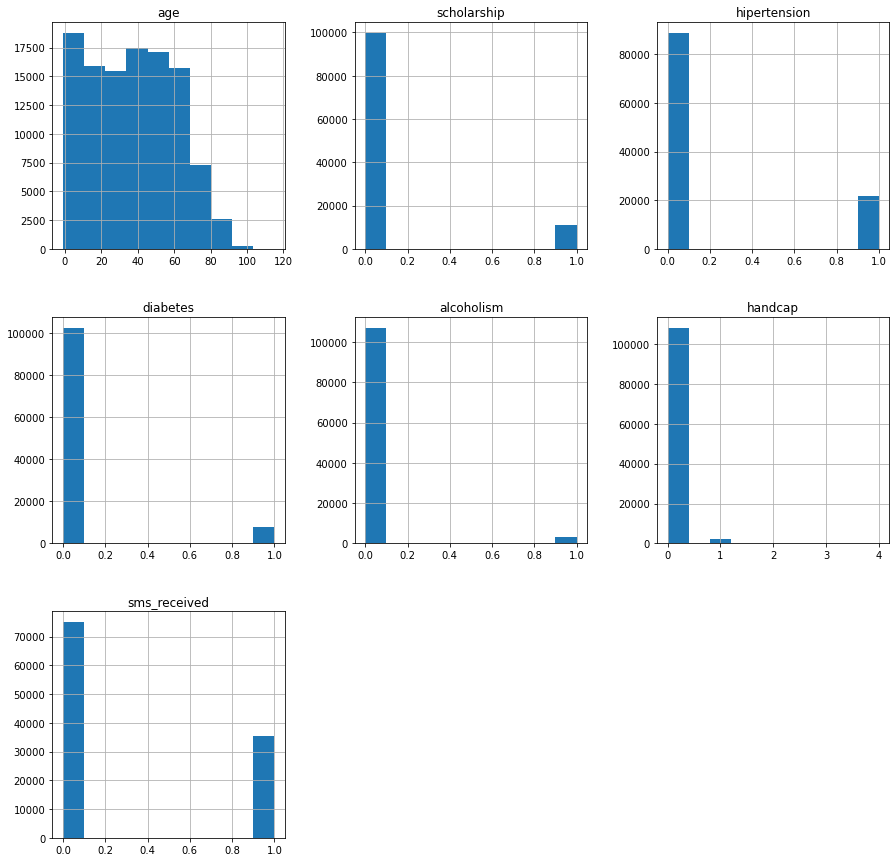

In [14]:
df.hist(figsize=(15,15));

to check whether age was a factor in people showing 

In [15]:
#getting the columns 
df.age[present].mean()

37.790064393252315

In [16]:
df.age[absent].mean()

34.31766656212196

Looking at the mean ages you could see that the mean age ffor the patients who showed is slightly higher than the mean age of the people who didnt show.Showing that people of old age wer more likely to show for their appoinments.
Im going to plot a graph to show the findings visually 

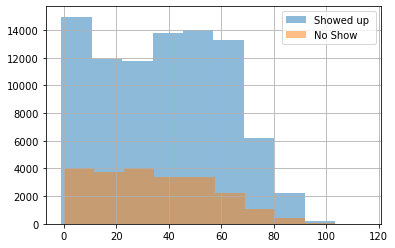

In [17]:
df.age[present].hist(alpha=0.5, label='Showed up ')
df.age[absent].hist(alpha=0.5, label='No Show ')
plt.legend();

to check whether scholarship was a factor in people in people showing up 

In [18]:
df.scholarship[present].count()

88208

In [19]:
df.scholarship[absent].count()

22319

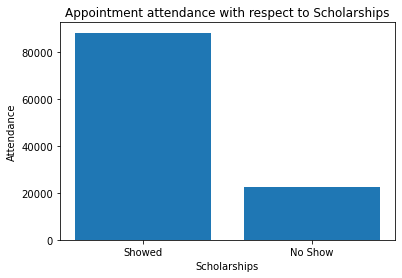

In [20]:
#creating a bar chat with labels 
locations = [1, 2]
heights = [df.scholarship[present].count(), df.scholarship[absent].count()]
labels = ['Showed', 'No Show']
plt.bar(locations, heights, tick_label=labels)
plt.title('Appointment attendance with respect to Scholarships')
plt.xlabel('Scholarships')
plt.ylabel('Attendance');

In [21]:
df.query('no_show == "No"').count()

gender           88208
age              88208
neighbourhood    88208
scholarship      88208
hipertension     88208
diabetes         88208
alcoholism       88208
handcap          88208
sms_received     88208
no_show          88208
dtype: int64

In [22]:
schola = df.query('scholarship == 1')
no_schola = df.query('scholarship == 0')

In [23]:
schola.count()

gender           10861
age              10861
neighbourhood    10861
scholarship      10861
hipertension     10861
diabetes         10861
alcoholism       10861
handcap          10861
sms_received     10861
no_show          10861
dtype: int64

In [24]:
no_schola.count()

gender           99666
age              99666
neighbourhood    99666
scholarship      99666
hipertension     99666
diabetes         99666
alcoholism       99666
handcap          99666
sms_received     99666
no_show          99666
dtype: int64

In [25]:
schola[present].scholarship.count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11372\353026059.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  schola[present].scholarship.count()


8283

In [26]:
schola[absent].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11372\349269059.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  schola[absent].count()


gender           2578
age              2578
neighbourhood    2578
scholarship      2578
hipertension     2578
diabetes         2578
alcoholism       2578
handcap          2578
sms_received     2578
no_show          2578
dtype: int64

In [27]:
no_schola[present].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11372\807881187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_schola[present].count()


gender           79925
age              79925
neighbourhood    79925
scholarship      79925
hipertension     79925
diabetes         79925
alcoholism       79925
handcap          79925
sms_received     79925
no_show          79925
dtype: int64

In [28]:
no_schola[absent].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11372\1515418267.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_schola[absent].count()


gender           19741
age              19741
neighbourhood    19741
scholarship      19741
hipertension     19741
diabetes         19741
alcoholism       19741
handcap          19741
sms_received     19741
no_show          19741
dtype: int64

In [30]:
def plot(labels,bar1,bar2,xlabel,ylabel,title):
    X = labels
    show = bar1
    nshow = bar2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis - 0.2, show, 0.4, label = 'Show')
    plt.bar(X_axis + 0.2, nshow, 0.4, label = 'No show')
    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend();
    

C:\Users\HP\AppData\Local\Temp\ipykernel_11372\4286497848.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scholarship= [schola[present].scholarship.count(),no_schola[present].scholarship.count()]
C:\Users\HP\AppData\Local\Temp\ipykernel_11372\4286497848.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_scholarship = [schola[absent].scholarship.count(),no_schola[absent].scholarship.count()]


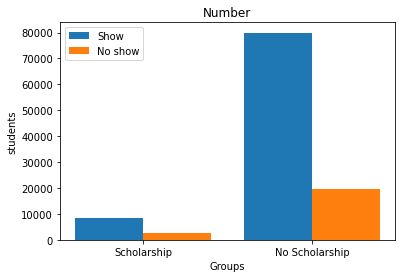

In [33]:
labels = ['Scholarship','No Scholarship']
scholarship= [schola[present].scholarship.count(),no_schola[present].scholarship.count()]
no_scholarship = [schola[absent].scholarship.count(),no_schola[absent].scholarship.count()]
xlabel="Groups" 
ylabel ="students"
title = "Number"


plot(labels,scholarship,no_scholarship,xlabel,ylabel,title)


to make the anlysis clearer i will view the above bar chart in relation to histograms 

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\1876289554.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  show = [schola[present].scholarship.count()/schola.scholarship.count(),no_schola[present].scholarship.count()/no_schola.scholarship.count()]
C:\Users\HP\AppData\Local\Temp\ipykernel_11168\1876289554.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nshow = [schola[absent].scholarship.count()/schola.scholarship.count(),no_schola[absent].scholarship.count()/no_schola.scholarship.count()]


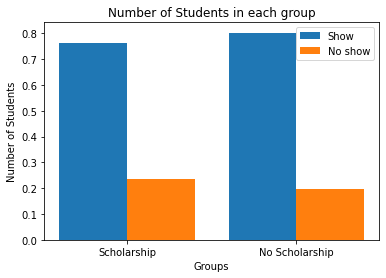

In [78]:
X = ['Scholarship','No Scholarship']
show = [schola[present].scholarship.count()/schola.scholarship.count(),no_schola[present].scholarship.count()/no_schola.scholarship.count()]
nshow = [schola[absent].scholarship.count()/schola.scholarship.count(),no_schola[absent].scholarship.count()/no_schola.scholarship.count()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, show, 0.4, label = 'Show')
plt.bar(X_axis + 0.2, nshow, 0.4, label = 'No show')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()

from the graph of proportions above it shows that the percentage of people with scholarships who show up for their appointmentsis less than the percentage of people without scholarships  

#### checking if the sms motifications are also a factor for attendance 

In [91]:
df['sms_received'].unique() 

array([0, 1], dtype=int64)

In [89]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [133]:
sms = df.query('sms_received == 1')
sms = df.query('sms_received == 0')

In [134]:
sms.count()

gender           75045
age              75045
neighbourhood    75045
scholarship      75045
hipertension     75045
diabetes         75045
alcoholism       75045
handcap          75045
sms_received     75045
no_show          75045
dtype: int64

In [130]:
no_sms.count()

gender           75045
age              75045
neighbourhood    75045
scholarship      75045
hipertension     75045
diabetes         75045
alcoholism       75045
handcap          75045
sms_received     75045
no_show          75045
dtype: int64

In [137]:
sms[present].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\4153537879.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sms[present].count()


gender           62510
age              62510
neighbourhood    62510
scholarship      62510
hipertension     62510
diabetes         62510
alcoholism       62510
handcap          62510
sms_received     62510
no_show          62510
dtype: int64

In [106]:
sms[absent].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\2136774000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sms[absent].count()


gender           9784
age              9784
neighbourhood    9784
scholarship      9784
hipertension     9784
diabetes         9784
alcoholism       9784
handcap          9784
sms_received     9784
no_show          9784
dtype: int64

In [138]:
no_sms[absent].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\3415912113.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_sms[absent].count()


gender           12535
age              12535
neighbourhood    12535
scholarship      12535
hipertension     12535
diabetes         12535
alcoholism       12535
handcap          12535
sms_received     12535
no_show          12535
dtype: int64

In [140]:
no_sms[present].count()

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\2321109574.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_sms[present].count()


gender           62510
age              62510
neighbourhood    62510
scholarship      62510
hipertension     62510
diabetes         62510
alcoholism       62510
handcap          62510
sms_received     62510
no_show          62510
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11168\3355570209.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  show = [sms[present].sms_received.count(),no_sms[present].sms_received.count()]
C:\Users\HP\AppData\Local\Temp\ipykernel_11168\3355570209.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nshow = [sms[absent].sms_received.count(),no_sms[absent].sms_received.count()]


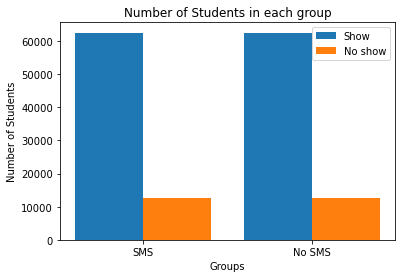

In [142]:
X = ['SMS','No SMS']
show = [sms[present].sms_received.count(),no_sms[present].sms_received.count()]
nshow = [sms[absent].sms_received.count(),no_sms[absent].sms_received.count()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, show, 0.4, label = 'Show')
plt.bar(X_axis + 0.2, nshow, 0.4, label = 'No show')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()

using proportions 

In [1]:
X = ['SMS','No SMS']
show = [sms[present].sms_received.count()/sms.sms_received.count(),no_sms[present].sms_received.count()/no_sms.sms_received.count()]
nshow = [sms[absent].sms_received.count()/sms.sms_received.count(),no_sms[absent].sms_received.count()/no_sms.sms_received.count()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, show, 0.4, label = 'Show')
plt.bar(X_axis + 0.2, nshow, 0.4, label = 'No show')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()

NameError: name 'sms' is not defined